In [42]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Defina o ID do time Charlotte Hornets (consultar se atualizado)
TEAM_ID = '1610612766'  # Charlotte Hornets

# Função para buscar jogos de uma temporada específica
def get_games_for_season(team_id, season):
    game_finder = leaguegamefinder.LeagueGameFinder(
        team_id_nullable=team_id,
        season_nullable=season
    )
    games = game_finder.get_data_frames()[0]
    return games

# Temporadas de interesse
seasons = ["2023-24", "2024-25"]

# Obtenha dados para as temporadas e combine em um DataFrame
all_games = pd.DataFrame()
for season in seasons:
    season_games = get_games_for_season(TEAM_ID, season)
    all_games = pd.concat([all_games, season_games])

# Exibindo os dados coletados
# print(all_games.head())

# Salvar em um arquivo CSV
# all_games.to_csv("charlotte_hornets_games_2023_2025.csv", index=False)


In [43]:
all_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612766,CHA,Charlotte Hornets,0022301187,2024-04-14,CHA @ CLE,W,241,120,...,0.818,10,37,47,36,10,9,9,11,10.0
1,22023,1610612766,CHA,Charlotte Hornets,0022301173,2024-04-12,CHA @ BOS,L,240,98,...,0.864,4,29,33,20,3,7,19,15,-33.0
2,22023,1610612766,CHA,Charlotte Hornets,0022301159,2024-04-10,CHA @ ATL,W,241,115,...,0.955,5,28,33,25,11,2,13,18,1.0
3,22023,1610612766,CHA,Charlotte Hornets,0022301144,2024-04-09,CHA vs. DAL,L,240,104,...,0.762,8,31,39,24,8,3,11,16,-26.0
4,22023,1610612766,CHA,Charlotte Hornets,0022301135,2024-04-07,CHA vs. OKC,L,241,118,...,0.786,7,29,36,29,12,9,18,14,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,12024,1610612766,CHA,Charlotte Hornets,0012400061,2024-10-17,CHA @ IND,L,266,116,...,0.652,11,41,52,28,11,8,32,30,-5.0
41,12024,1610612766,CHA,Charlotte Hornets,0012400052,2024-10-15,CHA @ NYK,L,239,105,...,0.867,12,33,45,22,8,5,13,19,-6.0
42,12024,1610612766,CHA,Charlotte Hornets,0012400027,2024-10-10,CHA @ MEM,W,238,119,...,0.818,13,35,48,22,9,6,21,21,25.0
43,12024,1610612766,CHA,Charlotte Hornets,0012400015,2024-10-08,CHA vs. MIA,W,241,111,...,0.771,15,40,55,19,7,7,21,21,3.0


In [44]:
all_games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [45]:
# 1. Verificar dados ausentes
print("Dados Ausentes:")
print(all_games.isnull().sum())  # Contagem de valores nulos
print("\n")

Dados Ausentes:
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
dtype: int64




In [46]:
# 2. Verificar valores redundantes (duplicados)
print("Valores Duplicados:")
print(all_games.duplicated().sum())  # Contagem de linhas duplicadas
print("\n")

Valores Duplicados:
0




In [47]:
# 3. Verificar inconsistências (valores fora do padrão esperado)
print("Resumo Estatístico:")
print(all_games.describe(include="all"))  # Resumo estatístico de variáveis numéricas e categóricas
print("\n")

Resumo Estatístico:
       SEASON_ID       TEAM_ID TEAM_ABBREVIATION          TEAM_NAME  \
count        131  1.310000e+02               131                131   
unique         4           NaN                 1                  1   
top        22023           NaN               CHA  Charlotte Hornets   
freq          82           NaN               131                131   
mean         NaN  1.610613e+09               NaN                NaN   
std          NaN  0.000000e+00               NaN                NaN   
min          NaN  1.610613e+09               NaN                NaN   
25%          NaN  1.610613e+09               NaN                NaN   
50%          NaN  1.610613e+09               NaN                NaN   
75%          NaN  1.610613e+09               NaN                NaN   
max          NaN  1.610613e+09               NaN                NaN   

           GAME_ID   GAME_DATE      MATCHUP   WL         MIN         PTS  ...  \
count          131         131          131  1

In [48]:
# 4. Detectar valores enviesados (distribuições assimétricas)
numeric_columns = all_games.select_dtypes(include=[np.number]).columns
print("Skewness (Assimetria das Distribuições):")
print(all_games[numeric_columns].skew())  # Valores próximos de 0 indicam baixa assimetria
print("\n")


Skewness (Assimetria das Distribuições):
TEAM_ID       0.000000
MIN           4.221346
PTS          -0.125423
FGM          -0.019788
FGA           0.155295
FG_PCT        0.318765
FG3M          0.242912
FG3A          0.316339
FG3_PCT       0.069289
FTM           0.269172
FTA           0.317466
FT_PCT       -0.331700
OREB          0.701149
DREB          0.340111
REB           0.520091
AST           0.212290
STL           0.113937
BLK           0.309274
TOV           0.617678
PF            0.009586
PLUS_MINUS   -0.404112
dtype: float64




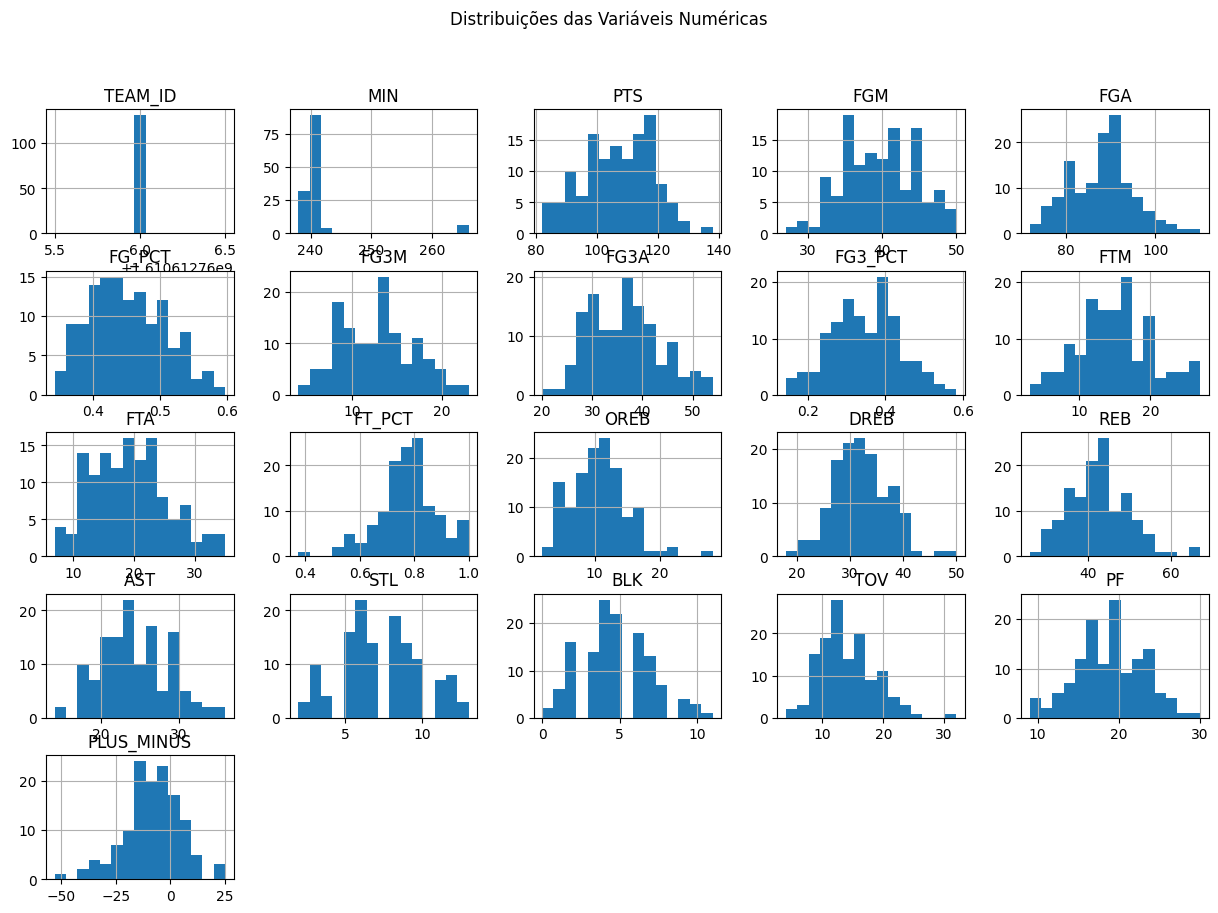

In [49]:
# Visualizar distribuições das variáveis numéricas
all_games[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições das Variáveis Numéricas")
plt.show()

In [50]:
# 5. Detectar valores ruidosos e outliers
print("Outliers (utilizando o método IQR):")
for column in numeric_columns:
    Q1 = all_games[column].quantile(0.25)  # Primeiro quartil
    Q3 = all_games[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = all_games[(all_games[column] < lower_bound) | (all_games[column] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {column} tem {len(outliers)} outliers.")
print("\n")

Outliers (utilizando o método IQR):
Coluna MIN tem 8 outliers.
Coluna FGA tem 2 outliers.
Coluna FTA tem 3 outliers.
Coluna FT_PCT tem 3 outliers.
Coluna OREB tem 3 outliers.
Coluna DREB tem 1 outliers.
Coluna REB tem 2 outliers.
Coluna BLK tem 1 outliers.
Coluna TOV tem 1 outliers.
Coluna PLUS_MINUS tem 4 outliers.




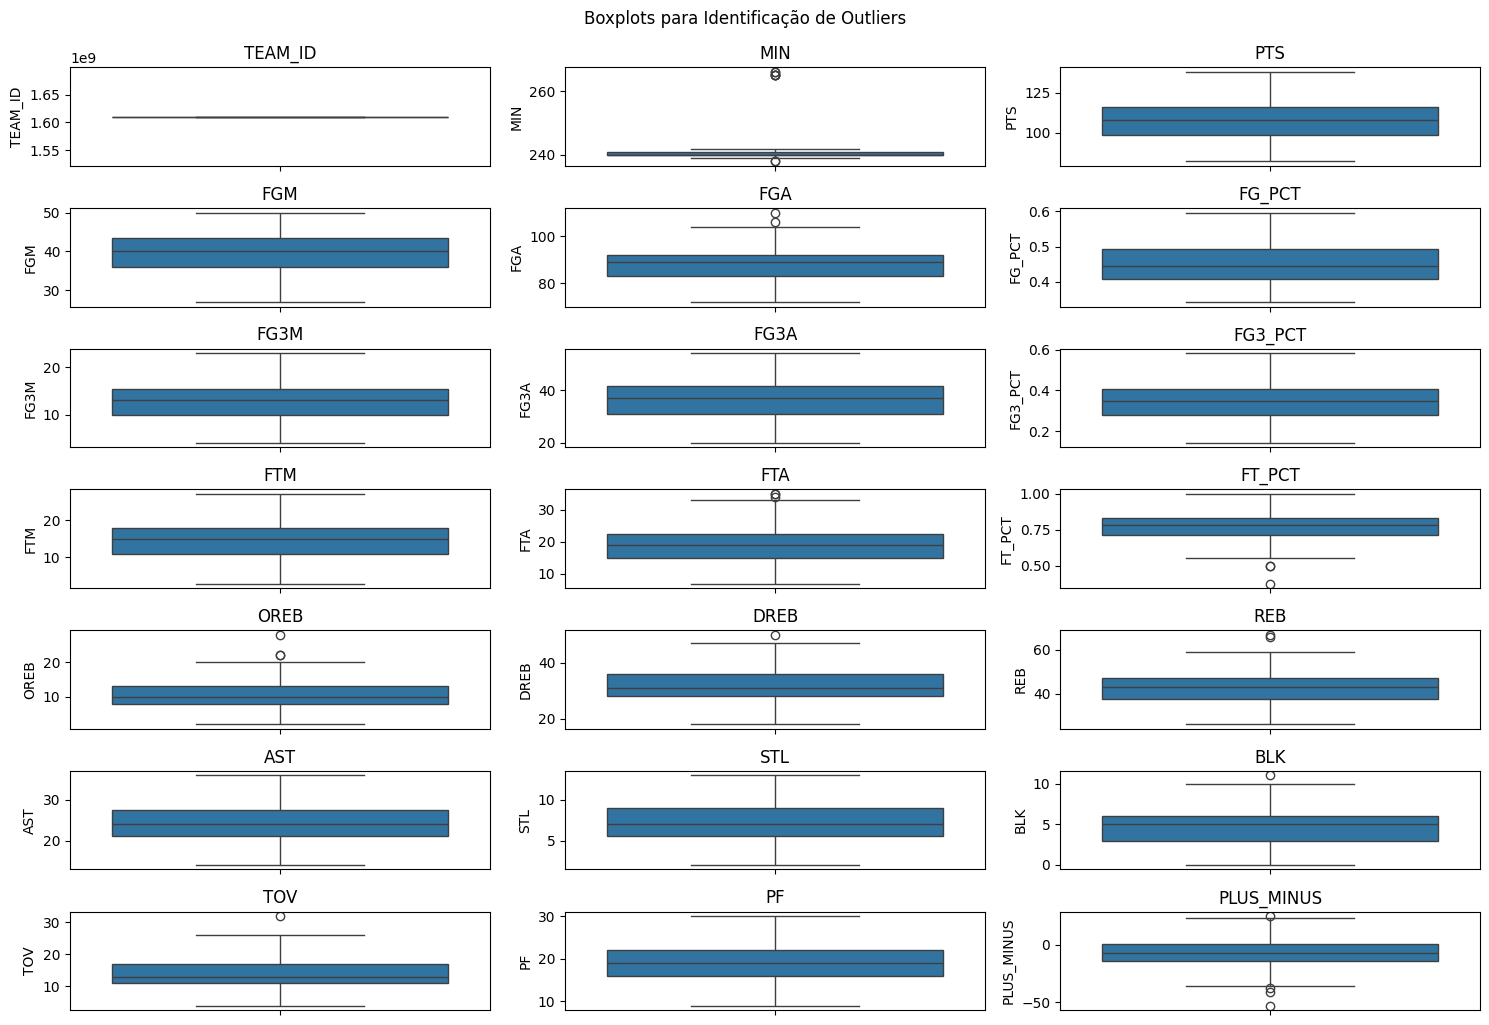

In [51]:
# Visualizar os outliers com boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjusted subplot layout
    sns.boxplot(data=all_games, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots para Identificação de Outliers", y=1.02)
plt.show()

Justificativa: A Coluna como MIN (minutos jogados): Apresenta um valor que pode ser legítimo, pois um jogador pode ter tido tempos de jogo muito altos ou baixos.
FGA, FTA, REB, PLUS_MINUS, etc.: Estes valores extremos podem ocorrer naturalmente em desempenhos excepcionais, então o contexto dos jogos deve ser considerado.

In [52]:
# Imputação de Outliers (ajuste de valores extremos)
# Clamping (limitação): Ajusta os outliers para os limites do intervalo IQR.

# for column in ['MIN', 'FGA', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'BLK', 'TOV', 'PLUS_MINUS']:
#     Q1 = all_games[column].quantile(0.25)
#     Q3 = all_games[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     all_games[column] = np.where(all_games[column] < lower_bound, lower_bound, all_games[column])
#     all_games[column] = np.where(all_games[column] > upper_bound, upper_bound, all_games[column])


In [53]:
# 6. Resumo de possíveis problemas
print("Problemas Identificados:")
if all_games.isnull().values.any():
    print("- Existem dados ausentes.")
if all_games.duplicated().any():
    print("- Existem dados redundantes (duplicados).")
if not all_games[numeric_columns].skew().between(-0.5, 0.5).all():
    print("- Existem variáveis com distribuição enviesada.")
print("- Análise de outliers foi realizada (veja os gráficos de boxplot).")

Problemas Identificados:
- Existem variáveis com distribuição enviesada.
- Análise de outliers foi realizada (veja os gráficos de boxplot).


In [54]:
# 6. Resumo de possíveis problemas
print("Problemas Identificados:")
if all_games.isnull().values.any():
    print("- Existem dados ausentes.")
if all_games.duplicated().any():
    print("- Existem dados redundantes (duplicados).")
if not all_games[numeric_columns].skew().between(-0.5, 0.5).all():
    print("- Existem variáveis com distribuição enviesada.")
print("- Análise de outliers foi realizada (veja os gráficos de boxplot).")

Problemas Identificados:
- Existem variáveis com distribuição enviesada.
- Análise de outliers foi realizada (veja os gráficos de boxplot).


In [55]:
# Transformações Logarítmicas
skewed_columns = ['FGA', 'FTA', 'REB']
for column in skewed_columns:
    all_games[column] = np.log1p(all_games[column])  # log(1 + valor)

In [56]:
# Normalização ou Padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_games[numeric_columns] = scaler.fit_transform(all_games[numeric_columns])

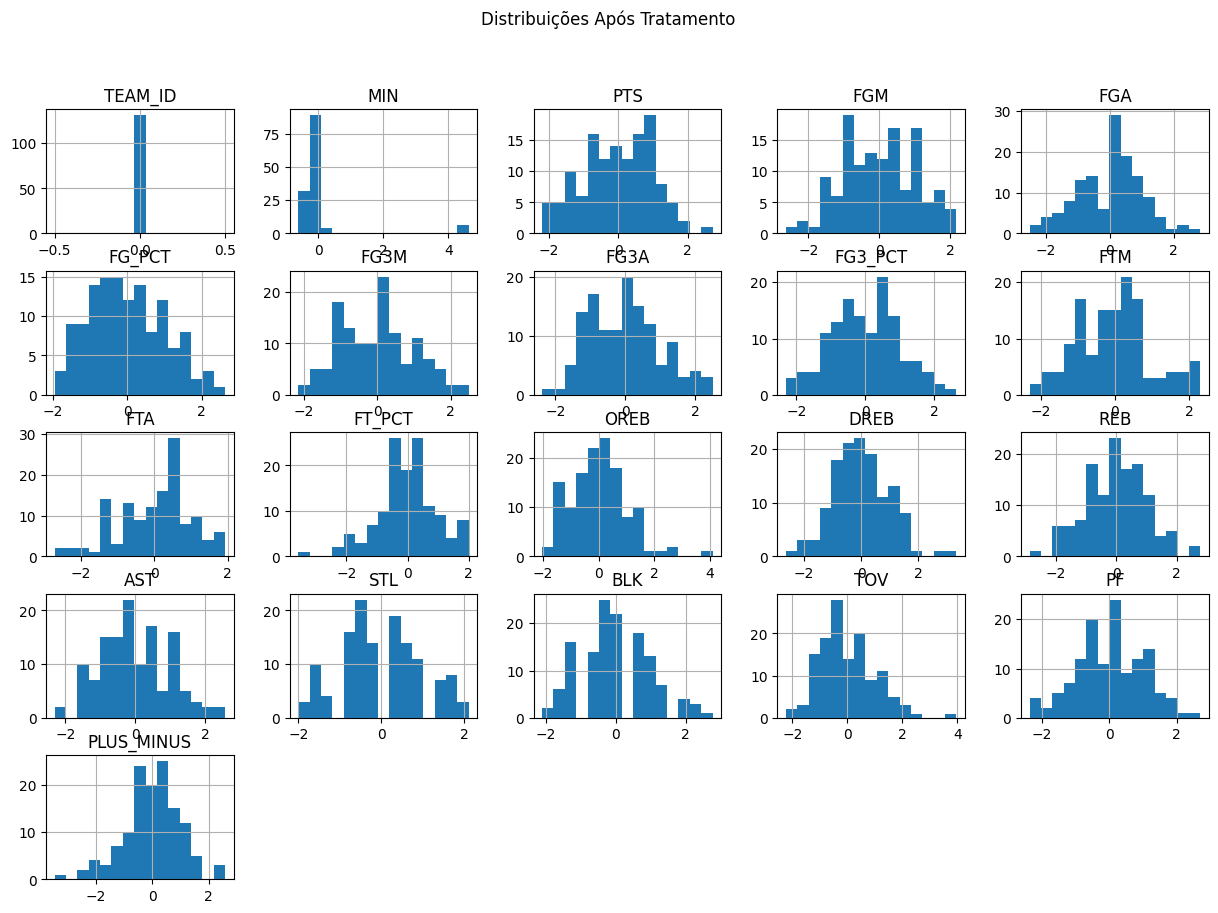

In [57]:
# Histogramas
all_games[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições Após Tratamento")
plt.show()

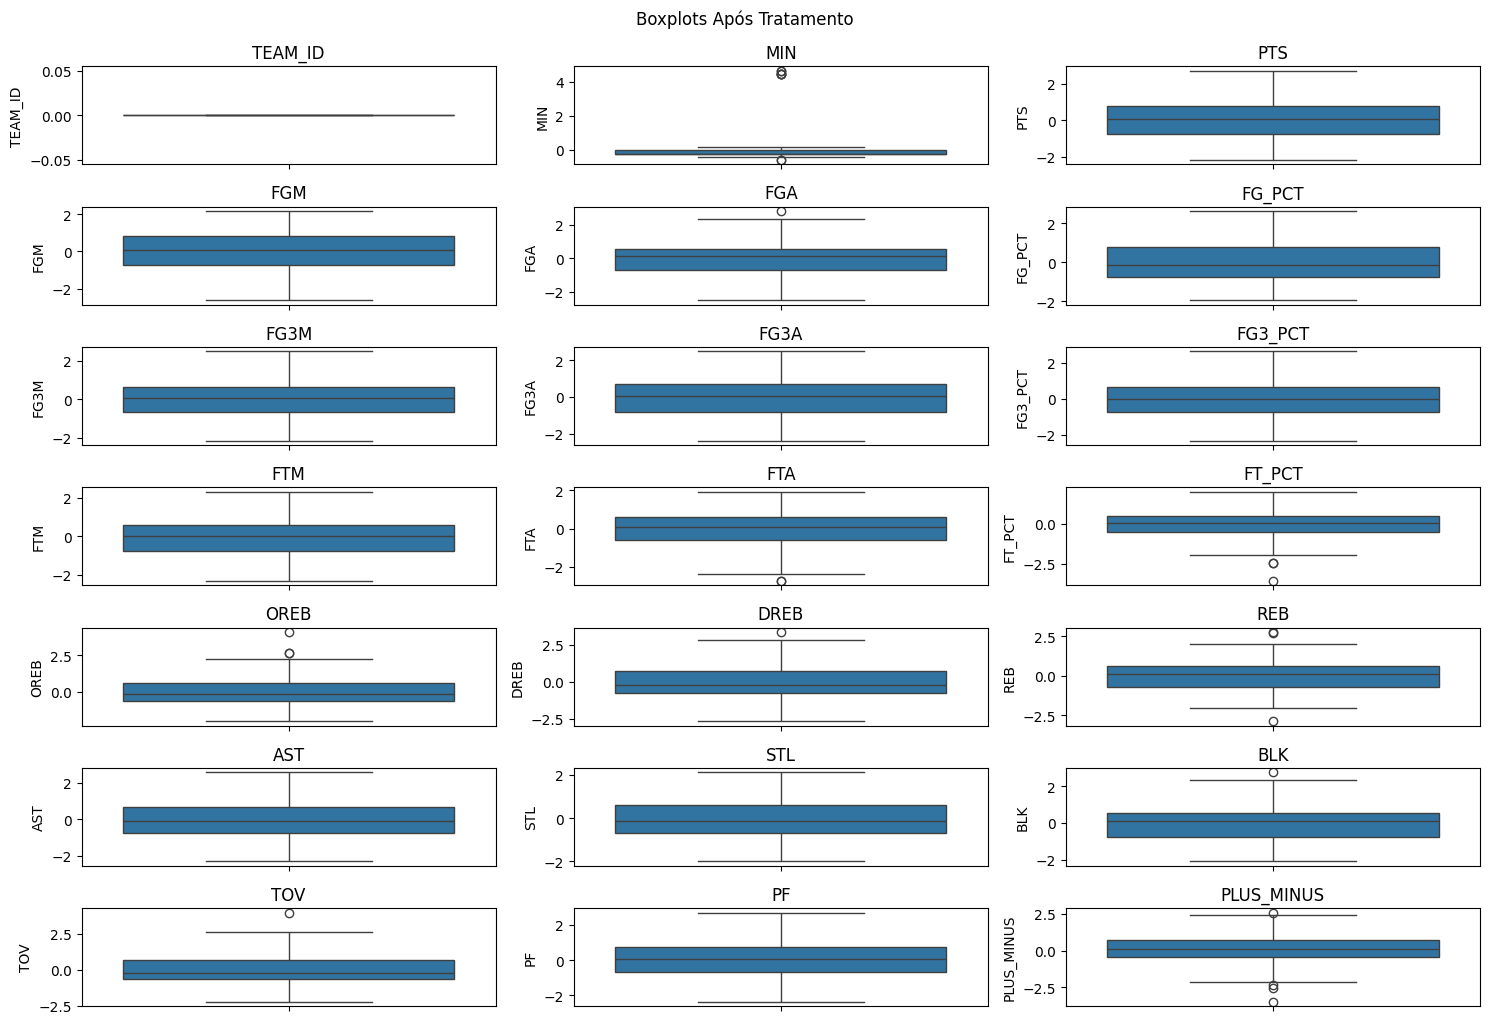

In [58]:
# Boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically


for i, column in enumerate(numeric_columns):
    # Adjust the subplot layout to accommodate all numeric columns
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=all_games, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots Após Tratamento", y=1.02)
plt.show()

In [59]:
# Excluir colunas que não são importantes para o modelo de previsão
columns_to_drop = ["GAME_DATE", "GAME_ID", "TEAM_ID", "TEAM_NAME"]
all_games = all_games.drop(columns=columns_to_drop, errors="ignore")

In [60]:
# 1. Converter dados qualitativos para quantitativos
from sklearn.preprocessing import LabelEncoder, StandardScaler

qualitative_columns = all_games.select_dtypes(include=["object"]).columns  # Identificar colunas categóricas
label_encoders = {}
for column in qualitative_columns:
    le = LabelEncoder()
    all_games[column] = le.fit_transform(all_games[column])
    label_encoders[column] = le

In [61]:
# 3. Verificar a transformação
print("Dados transformados:")
print(all_games.head())

Dados transformados:
   SEASON_ID  TEAM_ABBREVIATION  MATCHUP  WL       MIN       PTS       FGM  \
0          2                  0        4   1 -0.048593  1.139879  1.334662   
1          2                  0        2   0 -0.235818 -0.785755 -1.586305   
2          2                  0        0   1 -0.048593  0.702235  0.082819   
3          2                  0       34   0 -0.235818 -0.260582 -0.125821   
4          2                  0       48   0 -0.048593  0.964822  1.126022   

        FGA    FG_PCT      FG3M  ...    FT_PCT      OREB      DREB       REB  \
0  0.434117  0.976897  1.521684  ...  0.377182 -0.149199  0.915409  0.647747   
1 -1.832661 -0.529729  0.544524  ...  0.787378 -1.562091 -0.583573 -1.455847   
2 -1.345879  0.994833  0.300234  ...  1.598854 -1.326609 -0.770946 -1.455847   
3  0.154195 -0.224816 -0.676926  ... -0.122188 -0.620163 -0.208828 -0.464450   
4 -0.724492  1.640530  1.033104  ...  0.091828 -0.855645 -0.583573 -0.940030   

        AST       STL       B

In [62]:
# 4. (Opcional) Salvar o dataset transformado
# all_games.to_csv("charlotte_hornets_games_transformed.csv", index=False)

In [63]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

# Lista de times organizados por conferência
eastern_conference_teams = [
    "ATL", "BOS", "BKN", "CHA", "CHI", "CLE", "DET", "IND", "MIA", "MIL",
    "NYK", "ORL", "PHI", "TOR", "WAS"
]

western_conference_teams = [
    "DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC",
    "PHX", "POR", "SAC", "SAS", "UTA"
]

# Função para listar todos os times agrupados por conferência
def get_teams_by_conference():
    nba_teams = teams.get_teams()
    eastern_conference = [team for team in nba_teams if team["abbreviation"] in eastern_conference_teams]
    western_conference = [team for team in nba_teams if team["abbreviation"] in western_conference_teams]
    return eastern_conference, western_conference

# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

In [64]:
# Listar os times da NBA por conferência
eastern, western = get_teams_by_conference()

print("Eastern Conference Teams:")
for team in eastern:
    print(f"{team['full_name']} ({team['abbreviation']})")

print("\nWestern Conference Teams:")
for team in western:
    print(f"{team['full_name']} ({team['abbreviation']})")

# Buscar dados dos jogos das temporadas 2023-24 e 2024-25
games_2023_24 = get_games_by_season("2023-24")
games_2024_25 = get_games_by_season("2024-25")

# Visualizar a estrutura dos dados
print("\nJogos da temporada 2023-24:")
print(games_2023_24.head())

print("\nJogos da temporada 2024-25:")
print(games_2024_25.head())


Eastern Conference Teams:
Atlanta Hawks (ATL)
Boston Celtics (BOS)
Cleveland Cavaliers (CLE)
Chicago Bulls (CHI)
Miami Heat (MIA)
Milwaukee Bucks (MIL)
Brooklyn Nets (BKN)
New York Knicks (NYK)
Orlando Magic (ORL)
Indiana Pacers (IND)
Philadelphia 76ers (PHI)
Toronto Raptors (TOR)
Washington Wizards (WAS)
Detroit Pistons (DET)
Charlotte Hornets (CHA)

Western Conference Teams:
New Orleans Pelicans (NOP)
Dallas Mavericks (DAL)
Denver Nuggets (DEN)
Golden State Warriors (GSW)
Houston Rockets (HOU)
Los Angeles Clippers (LAC)
Los Angeles Lakers (LAL)
Minnesota Timberwolves (MIN)
Phoenix Suns (PHX)
Portland Trail Blazers (POR)
Sacramento Kings (SAC)
San Antonio Spurs (SAS)
Oklahoma City Thunder (OKC)
Utah Jazz (UTA)
Memphis Grizzlies (MEM)

Jogos da temporada 2023-24:
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     42023  1610612738               BOS    Boston Celtics  0042300405   
1     42023  1610612742               DAL  Dallas Mavericks  0042300405   
2

In [65]:
from nba_api.stats.endpoints import leaguestandings

# Obter os dados de classificação
standings = leaguestandings.LeagueStandings()
standings_df = standings.get_data_frames()[0]

# Exibir as primeiras linhas e os nomes das colunas
print(standings_df.head())  # Mostra os primeiros registros
print(standings_df.columns)  # Lista todas as colunas disponíveis


  LeagueID SeasonID      TeamID       TeamCity   TeamName Conference  \
0       00    22024  1610612739      Cleveland  Cavaliers       East   
1       00    22024  1610612760  Oklahoma City    Thunder       West   
2       00    22024  1610612738         Boston    Celtics       East   
3       00    22024  1610612745        Houston    Rockets       West   
4       00    22024  1610612752       New York     Knicks       East   

  ConferenceRecord  PlayoffRank ClinchIndicator   Division  ...   May   Jun  \
0            23-5             1                    Central  ...  None  None   
1            20-7             1                  Northwest  ...  None  None   
2            23-9             2                   Atlantic  ...  None  None   
3            19-9             2                  Southwest  ...  None  None   
4            22-10            3                   Atlantic  ...  None  None   

    Jul   Aug   Sep  Oct   Nov   Dec  PreAS PostAS  
0  None  None  None  5-0  12-3  12-1   

In [70]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Função para calcular a posição atual
def calculate_standings(games):
    # Filtrar jogos já realizados
    games_played = games[games['WL'].notnull()]
    
    # Calcular vitórias e derrotas
    standings = games_played.groupby('TEAM_ABBREVIATION').agg(
        Wins=('WL', lambda x: (x == 'W').sum()),
        Losses=('WL', lambda x: (x == 'L').sum())
    )
    
    # Adicionar a taxa de vitória (Win Percentage)
    standings['Win_Percentage'] = standings['Wins'] / (standings['Wins'] + standings['Losses'])
    
    # Ordenar por taxa de vitória
    standings = standings.sort_values(by='Win_Percentage', ascending=False).reset_index()
    return standings

# Função para exibir standings agrupados por conferência
def display_standings_by_conference(standings):
    eastern_standings = standings[standings['TEAM_ABBREVIATION'].isin(eastern_conference_teams)]
    western_standings = standings[standings['TEAM_ABBREVIATION'].isin(western_conference_teams)]

    print("\nEastern Conference Standings:")
    print(eastern_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

    print("\nWestern Conference Standings:")
    print(western_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

In [71]:
# Obter dados dos jogos da temporada atual (2024-25)
games_2024_25 = get_games_by_season("2024-25")

# Calcular a classificação
current_standings = calculate_standings(games_2024_25)

# Exibir a classificação agrupada por conferência
display_standings_by_conference(current_standings)


Eastern Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              CLE    36      11        0.765957
              BOS    35      15        0.700000
              NYK    33      17        0.660000
              MIL    27      20        0.574468
              IND    26      22        0.541667
              DET    26      23        0.530612
              MIA    25      23        0.520833
              ORL    24      25        0.489796
              ATL    23      25        0.479167
              CHI    22      28        0.440000
              PHI    18      30        0.375000
              BKN    15      34        0.306122
              TOR    15      34        0.306122
              CHA    13      32        0.288889
              WAS     8      40        0.166667

Western Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              OKC    40      10        0.800000
              HOU    32      15        0.680851
              MEM    32   

In [72]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais de vitórias e derrotas
def calculate_team_totals(team_games):
    # Verificar vitórias e derrotas em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

    totals = {
        "Total Wins": (team_games['WL'] == 'W').sum(),
        "Total Home Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Away')).sum(),
        "Total Losses": (team_games['WL'] == 'L').sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum(),
    }
    return totals

In [73]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
team_totals = calculate_team_totals(all_games)

In [74]:
# Exibir os resultados
print("Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:
Total Wins: 35
Total Home Wins: 20
Total Away Wins: 15
Total Losses: 96
Total Home Losses: 45
Total Away Losses: 51


In [75]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais e médias por jogo
def calculate_team_stats(team_games):
    # Verificar jogos em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')
    
    # Calcular estatísticas
    stats = {
        "Total Points per Game": team_games['PTS'].mean(),
        "Total Assists per Game": team_games['AST'].mean(),
        "Total Rebounds per Game": team_games['REB'].mean(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum()
    }
    return stats

In [76]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular as estatísticas
team_stats = calculate_team_stats(all_games)


In [77]:
# Exibir os resultados
print("Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:
Total Points per Game: 106.56
Total Assists per Game: 24.30
Total Rebounds per Game: 42.62
Total 3-Point Field Goals Made: 1680
Total Home Losses: 45
Total Away Losses: 51


In [78]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a divisão de dados
def calculate_rebounds_and_scoring(team_games):
    # Calcular totais
    totals = {
        "Total Rebounds": team_games['REB'].sum(),
        "Total Offensive Rebounds": team_games['OREB'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Points": team_games['PTS'].sum(),
        "Total 2-Point Field Goals Made": (team_games['FGM'] - team_games['FG3M']).sum(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Free Throws Made": team_games['FTM'].sum()
    }
    return totals

In [79]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
rebounds_and_scoring_totals = calculate_rebounds_and_scoring(all_games)


In [80]:
# Exibir os resultados
print("Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):")
for key, value in rebounds_and_scoring_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):
Total Rebounds: 5626
Total Offensive Rebounds: 1403
Total Defensive Rebounds: 4223
Total Points: 14066
Total 2-Point Field Goals Made: 3527
Total 3-Point Field Goals Made: 1680
Total Free Throws Made: 1972


In [81]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance


In [82]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)


In [83]:
# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 966
Total Defensive Rebounds: 4223
Total Blocks per Game: 4.73
Total Turnovers per Game: 14.06
Total Personal Fouls per Game: 18.74


In [101]:
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para formatar e exibir os jogos com as informações solicitadas
def display_team_games(team_games):
    team_games['GAME_DATE'] = pd.to_datetime(team_games['GAME_DATE'])
    
    # Calcular o adversário
    team_games['OPPONENT'] = team_games['MATCHUP'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else x.split(' ')[0])
    
    # Determinar se foi casa ou fora
    team_games['LOCATION'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    
    # Calcular vitória ou derrota
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    
    # Selecionar as colunas relevantes
    relevant_columns = ['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']
    team_games = team_games[relevant_columns]
    
    # Exibir as informações
    return team_games

In [102]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Exibir os jogos formatados
team_games_display = display_team_games(all_games)
print(team_games_display)


      GAME_DATE OPPONENT   RESULT LOCATION  PTS
204  2024-04-14      CLE  Vitória     Fora  120
208  2024-04-12      BOS  Derrota     Fora   98
250  2024-04-10      ATL  Vitória     Fora  115
271  2024-04-09      DAL  Derrota     Casa  104
310  2024-04-07      OKC  Derrota     Casa  118
...         ...      ...      ...      ...  ...
2172 2024-10-17      IND  Derrota     Fora  116
2201 2024-10-15      NYK  Derrota     Fora  105
2248 2024-10-10      MEM  Vitória     Fora  119
2265 2024-10-08      MIA  Vitória     Casa  111
2283 2024-10-06      NYK  Derrota     Casa  109

[132 rows x 5 columns]


In [103]:
# Supondo que all_games já tenha sido concatenado com os dados das temporadas 2023-24 e 2024-25
# e que a função `display_team_games` foi utilizada para formatar os dados corretamente.

# Função para calcular a vitória/derrota em casa ou fora
def calc_game_types(team_games):
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    team_games['LOCATION_TYPE'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    return team_games

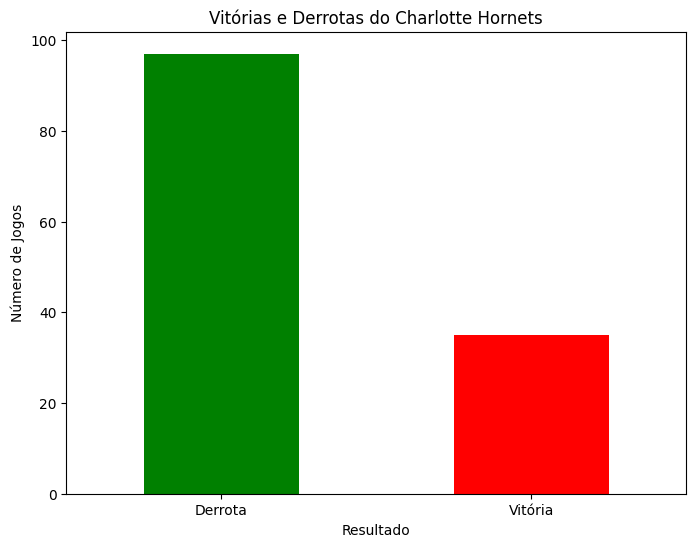

In [104]:
# Aplicando a função
all_games = calc_game_types(all_games)

# Gráfico de Barras Empilhado para Vitórias e Derrotas
victories_losses = all_games.groupby(['RESULT']).size()
ax = victories_losses.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
ax.set_title('Vitórias e Derrotas do Charlotte Hornets')
ax.set_ylabel('Número de Jogos')
ax.set_xlabel('Resultado')
plt.xticks(rotation=0)
plt.show()

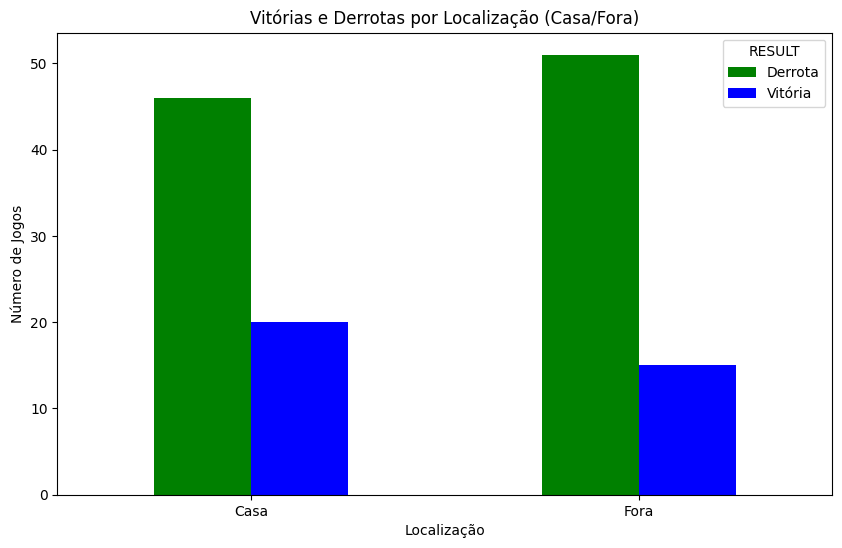

In [105]:
# Gráfico de Barras Agrupado para Vitórias em Casa, Vitórias Fora de Casa, Derrotas em Casa, Derrotas Fora de Casa
location_results = all_games.groupby(['LOCATION_TYPE', 'RESULT']).size().unstack().fillna(0)
location_results.plot(kind='bar', stacked=False, color=['green', 'blue', 'red', 'brown'], figsize=(10, 6))
plt.title('Vitórias e Derrotas por Localização (Casa/Fora)')
plt.ylabel('Número de Jogos')
plt.xlabel('Localização')
plt.xticks(rotation=0)
plt.show()

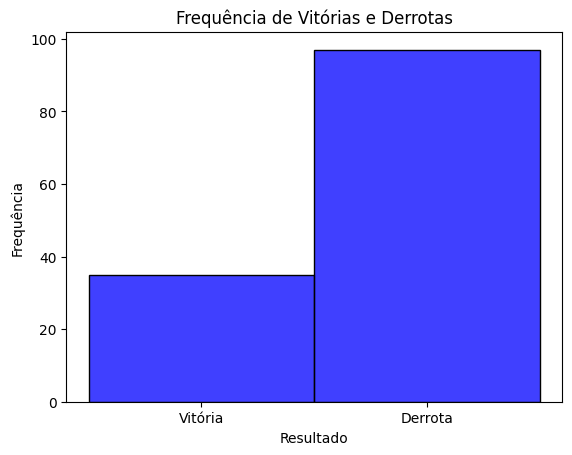

In [106]:
# Gráfico Histograma para Frequência de Vitórias e Derrotas
sns.histplot(all_games['RESULT'], kde=False, color='blue', bins=2)
plt.title('Frequência de Vitórias e Derrotas')
plt.xlabel('Resultado')
plt.ylabel('Frequência')
plt.show()

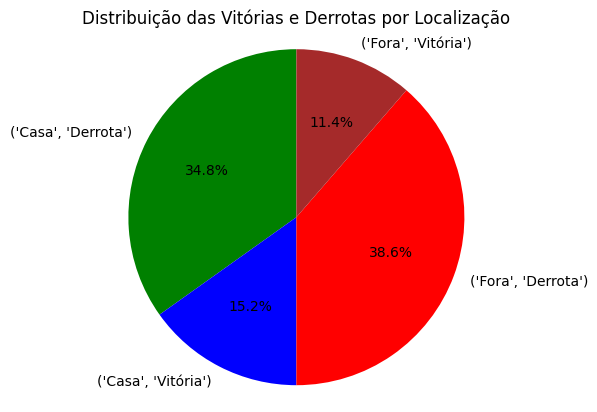

In [107]:
# Gráfico de Setor (Pizza) para Vitórias em Casa, Vitórias Fora, Derrotas em Casa, Derrotas Fora
location_results_counts = all_games.groupby(['LOCATION_TYPE', 'RESULT']).size()
labels = location_results_counts.index.tolist()
sizes = location_results_counts.values
colors = ['green', 'blue', 'red', 'brown']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Vitórias e Derrotas por Localização')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [108]:
# Gráfico de Radar para Média de Pontos Marcados e Sofridos (Casa vs Fora)
import numpy as np

home_games = all_games[all_games['LOCATION_TYPE'] == 'Casa']
away_games = all_games[all_games['LOCATION_TYPE'] == 'Fora']

In [122]:
Média de pontos marcados e sofridos
home_points_avg = home_games['PTS'].mean()
home_opponent_points_avg = home_games['PTS_OPPONENT'].mean()
away_points_avg = away_games['PTS'].mean()
away_opponent_points_avg = away_games['PTS_OPPONENT'].mean()

SyntaxError: invalid syntax (462400635.py, line 1)

In [112]:
# # Dados para o gráfico de radar
# labels = np.array(['Pontos Marcados', 'Pontos Sofridos'])
# home_values = np.array([home_points_avg, home_opponent_points_avg])
# away_values = np.array([away_points_avg, away_opponent_points_avg])

In [116]:
# # Configurando o gráfico de radar
# angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
# home_values = np.concatenate((home_values, [home_values[0]]))
# away_values = np.concatenate((away_values, [away_values[0]]))

# fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
# ax.fill(angles, home_values, color='green', alpha=0.25)
# ax.fill(angles, away_values, color='blue', alpha=0.25)
# ax.plot(angles, home_values, color='green', linewidth=2)
# ax.plot(angles, away_values, color='blue', linewidth=2)

# ax.set_yticklabels([])
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels(labels)

# plt.title('Média de Pontos Marcados e Sofridos (Casa vs Fora)')
# plt.show()

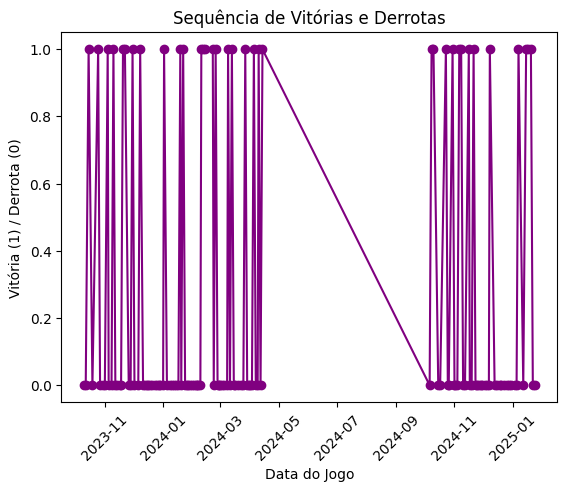

In [117]:
# Gráfico de Linhas para Sequência de Vitórias e Derrotas
sequence = all_games.groupby('GAME_DATE')['RESULT'].apply(lambda x: 'Vitória' if 'Vitória' in x.values else 'Derrota').tolist()
sequence_dates = all_games['GAME_DATE'].drop_duplicates().sort_values()

plt.plot(sequence_dates, [1 if result == 'Vitória' else 0 for result in sequence], marker='o', linestyle='-', color='purple')
plt.title('Sequência de Vitórias e Derrotas')
plt.xlabel('Data do Jogo')
plt.ylabel('Vitória (1) / Derrota (0)')
plt.xticks(rotation=45)
plt.show()


In [118]:
# Gráfico de Dispersão para equipes e Média de Pontos Marcados e Sofridos
team_avg_points = all_games.groupby('OPPONENT').agg({'PTS': 'mean', 'PTS_OPPONENT': 'mean'}).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(team_avg_points['PTS'], team_avg_points['PTS_OPPONENT'], c='orange')
plt.title('Média de Pontos Marcados e Sofridos por Adversário')
plt.xlabel('Pontos Marcados por Jogo')
plt.ylabel('Pontos Sofridos por Jogo')
plt.show()

KeyError: "Column(s) ['PTS_OPPONENT'] do not exist"

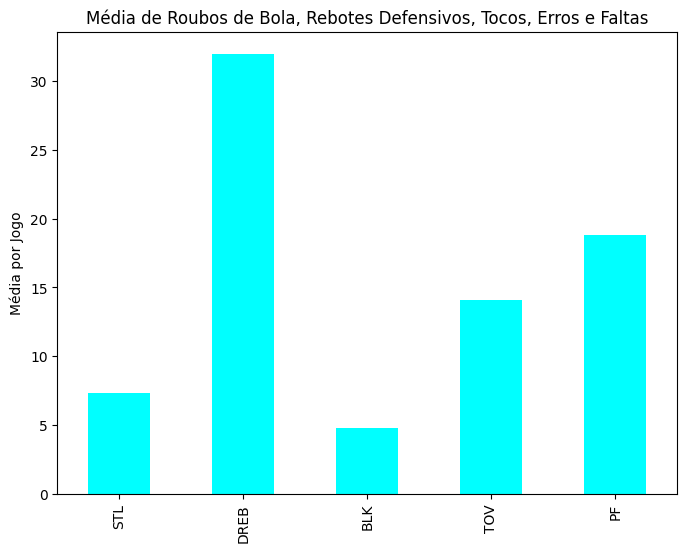

In [119]:
# Gráfico de Barras para Roubos de Bola, Rebotes Defensivos, Tocos por Jogo, Erros por Jogo, Faltas por Jogo
defensive_stats = all_games[['STL', 'DREB', 'BLK', 'TOV', 'PF']].mean()
defensive_stats.plot(kind='bar', color='cyan', figsize=(8, 6))
plt.title('Média de Roubos de Bola, Rebotes Defensivos, Tocos, Erros e Faltas')
plt.ylabel('Média por Jogo')
plt.show()


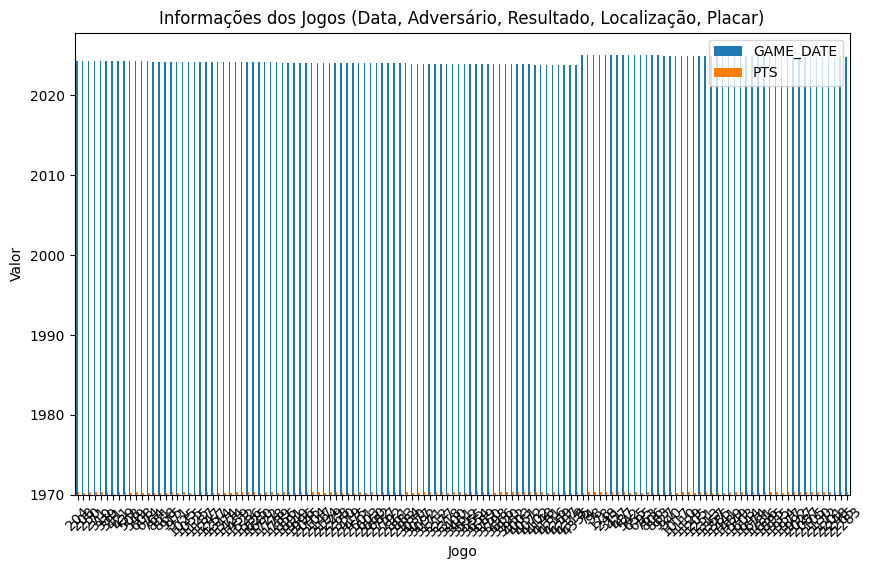

In [120]:
# Gráfico de Barras para Data do Jogo, Adversário, Vitória ou Derrota, Casa ou Fora, Placar
game_info = all_games[['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']]
game_info.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Informações dos Jogos (Data, Adversário, Resultado, Localização, Placar)')
plt.xlabel('Jogo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()